# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 2
---
### <span style="color:red"> Due Date: 14.03.24 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **IN PAIRS** (unless the computer homework grader approved differently) until **<span style="color:red"> Thursday 14.03.2024 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    You should submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw2_id1_id2.pdf` where `id1`,`id2` are the ID numbers of the submitting students.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw2_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos). make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory:
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email **and not during the workshop hours**.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---
### The ‘imshow’ function:
Full name: `matplotlib.axes.Axes.imshow`

The ‘imshow’ function is used to display images. The function expects to get a matrix whose members are in "discrete" `unit8` format (in the range [0,255]) or in "continuous" `float` format (in the range [0,1]). the dynamic range is determined by the format. These formats are acceptable for images. 


In [81]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import pyplot as plt
from numpy.fft import fft2 as dft, ifft2 as inverse_dft, fftshift as shift, ifftshift as inverse_shift

## <img src="https://img.icons8.com/external-kosonicon-outline-kosonicon/64/000000/external-bar-graph-diagram-and-graph-kosonicon-outline-kosonicon.png" style="height:50px;display:inline"/> Part 1 - Histograms and Gamma correction
---
In this section we will work with the puppy image in the given data directory. Please note that the puppy is adorable. 

### 1.a - Load the puppy image:
Load the puppy image from the given data directory and display it in gray scale.

[[228 228 228 ... 162 158 156]
 [228 228 228 ... 155 150 148]
 [228 228 228 ... 145 141 139]
 ...
 [119 118 116 ...  91  85  81]
 [119 118 116 ...  91  85  81]
 [119 118 116 ...  91  85  81]]


(<matplotlib.image.AxesImage at 0x222dde60048>, Text(0.5, 1.0, 'Puppy.jpg'))

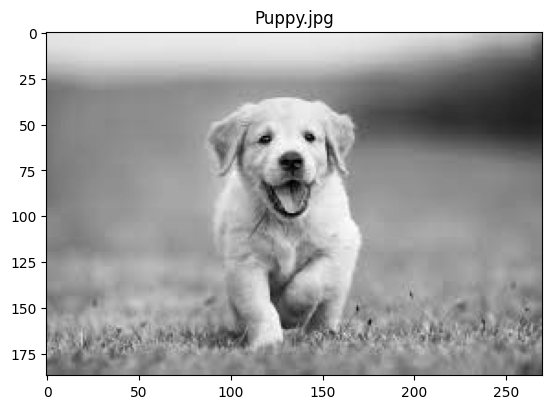

In [82]:
puppy = cv2.imread("given_data/puppy.jpg", cv2.IMREAD_GRAYSCALE)
uint_puppy = puppy.astype(np.uint8)
print(uint_puppy)
plt.imshow(uint_puppy, cmap='gray'), plt.title('Puppy.jpg')

### 1.b - Histogram
Display a histogram of the gray scale puppy image pixel distribution.

[ 18   3   0   2   6   2   0   3   5   5   5   4   1   1   7   3   6   4
   4   3   5   2   1   2   3   8   6   7   3   4   5   3  13  35 100  51
  58  46  46  59  49  63  53  69  57  52  65  81  89  81  82  81  75  80
  56  61  73  62  69  73  91  78  59  62  67  67  78  60  63  76  96  76
  81  93  75  77  93  91  84  97  91  91 100  92  80 100  83  96  88  95
  92 104  94  95  87  99  92 111  84 117  88 116  98 101 108 117 112 153
  99 105 133  99 156 132 154 147 171 164 218 217 235 218 249 248 315 278
 318 324 325 371 428 591 467 546 559 586 554 643 853 713 711 983 798 661
 736 721 719 687 695 767 740 752 754 708 690 764 736 740 735 720 778 712
 691 666 596 616 720 515 452 405 338 289 294 265 265 224 227 237 308 235
 250 218 192 175 221 161 162 156 151 163 172 146  82 113  97 149 136 105
  96 108 133 101 126 114 124 108 175 128 124 115  98 111 111 100 143 188
 193 172 143 180 177 143 199 191 195 169 248 228 265 247 243 326 251 253
 223 271 154 102  52  51  48  33  25  27  22  23  1

<BarContainer object of 256 artists>

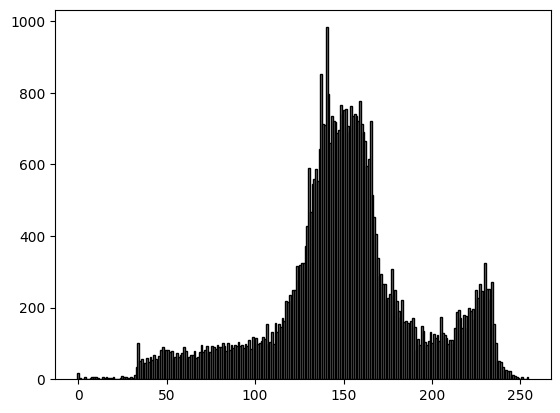

In [83]:
puppy_histogram, bins = np.histogram(uint_puppy.flatten(),bins=256)
print(puppy_histogram)
plt.bar(bins[:-1], puppy_histogram, width=1, color='gray', edgecolor='black')

### 1.c - gamma correction:
Implement the `gamma_correction` function.

In [84]:
def gamma_correction(img, gamma):
    """
    Perform gamma correction on a grayscale image.
    :param img: An input grayscale image - ndarray of uint8 type.
    :param gamma: the gamma parameter for the correction.
    :return:
        gamma_img: An output grayscale image after gamma correction - 
                   uint8 ndarray of size [H x W x 1].
    """
    def gamma_func(image):
        return 255 * (image/255) ** gamma
    return gamma_func(img)

Map the grayscale image from the previous section using following:
1. Gamma correction with $\gamma=0.5$
2. Gamma correction with $\gamma=1.5$

Display the grayscale output image for each of the mappings and their relevant histograms. Explain the difference between the two images and how it reflects in the histograms.

(<AxesSubplot:title={'center':'Puppy With Gamma - 1.5.jpg'}>,
 Text(0.5, 1.0, 'Puppy With Gamma - 1.5.jpg'))

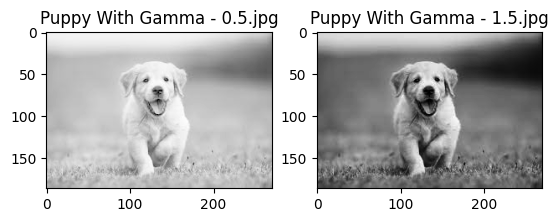

In [85]:
plt.subplot(1,2,1), plt.imshow(gamma_correction(uint_puppy, 0.5), cmap='gray'), plt.title('Puppy With Gamma - 0.5.jpg')
plt.subplot(1,2,2), plt.imshow(gamma_correction(uint_puppy, 1.5), cmap='gray'), plt.title('Puppy With Gamma - 1.5.jpg')

## <img src="https://img.icons8.com/doodle/48/000000/panorama.png" style="height:50px;display:inline"/> Part 2 - Creating a Panorama Using Motion Estimation
---
In This part we will learn how to create a panorama of images, meaning adding and "stitching" of different images. To do this we will use the correlation method in order to implement template matching (according to the principles presented in class, in exercise 4).

During this part we will use the music video of the song Corsica by Petru Guelfucci. You are encouraged
to open the file `Corsica.mp4`, to watch the video and enjoy the music. :)

### 2.a - Read frames from video:
Implement the `video_to_frames` function.

In [86]:
def video_to_frames(vid_path: str, start_second, end_second):
    """
    Load a video and return its frames from the wanted time range.
    :param vid_path: video file path.
    :param start_second: time of first frame to be taken from the 
                         video in seconds.
    :param end_second: time of last frame to be taken from the 
                         video in seconds.
    :return:
        frame_set: a 4D uint8 np array of size [num_of_frames x H x W x C] 
                   containing the wanted video frames.
    """
    corsica_video = cv2.VideoCapture(vid_path)
    corsica_video.set(cv2.CAP_PROP_POS_MSEC, start_second * 1000)
    curr_sceond = start_second * 1000
    ret, frame = corsica_video.read()
    frame_uint = frame.astype(np.uint8)
    frame_index = 0
    frames_array = [] 
    if start_second != end_second:
        frame_index += 1
        curr_sceond = corsica_video.get(cv2.CAP_PROP_POS_MSEC)
        while curr_sceond < end_second * 1000:
            ret, frame = corsica_video.read()
            frame_uint = frame.astype(np.uint8)
            frames_array.append(frame_uint)
            curr_sceond = corsica_video.get(cv2.CAP_PROP_POS_MSEC)
    frames_array = np.array(frames_array)
    return frames_array

**Notes:**
* If `start_second` and `end_second` have the same value then the function will return an array containing a single frame, from the chosen time (sized `[1 x H x W x C]`).
* If the video’s rate is X FPS (Frames Per Second), so after sampling 1 second (`start_second = t` and `end_second = t+1`) you will have X RGB images in your array (sized `[X x H x W x C]`).

### 2.b - Find High Correlation Location:
In order to create the panorama image with good stitching between two images, we have to find similar regions of interest between the images. In order to achieve this, we will use the Correlation Index (convolution without the kernel mirroring). The Correlation Index is defined for one-dimensional signals $f[n],g[n]$ as:
$$ (f\star g)[n] =\sum_{m=-\infty}^{\infty} f[m]g[m+n]$$
Meaning, the same as convolution, but without the mirroring.

Implement the `match_corr` function. The function accepts as input the 2d numpy array `corr_obj` containing an image of a certain component (e.g., an apple tree) and another 2d numpy array `img`, which must have equal or larger height and width in comparison to `corr_obj`. The `img` input is an image which contains in it the component from `corr_obj` (e.g. - an image of a graden with the same apple tree in it). 

The function will perform 2d correlation between the input arrays and will return the location (indices) of `corr_obj`'s center using the coordinates of `img`.

For example, given the following `corr_obj` (left) and `img` (right):

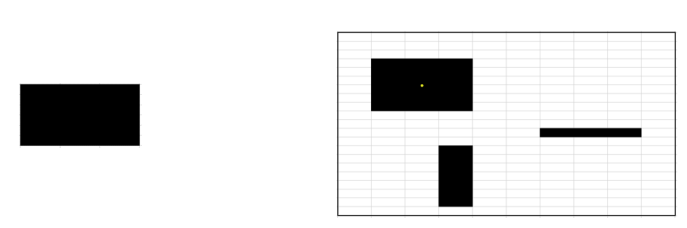

The output of the function will be the 2d coordinates of the yellow dot in `img`.

In [87]:
def match_corr(corr_obj, img):
    """
    return the center coordinates of the location of 'corr_obj' in 'img'.
    :param corr_obj: 2D numpy array of size [H_obj x W_obj] 
                     containing an image of a component.
    :param img: 2D numpy array of size [H_img x W_img] 
                where H_img >= H_obj and W_img>=W_obj, 
                containing an image with the 'corr_obj' component in it.
    :return:
        match_coord: the two center coordinates in 'img' 
                     of the 'corr_obj' component.
    """
    self_correlation = cv2.filter2D(corr_obj, 4, corr_obj, borderType = cv2.BORDER_CONSTANT)
    max_obj = np.max(self_correlation)
    correlation = cv2.filter2D(img, 4 ,corr_obj, borderType = cv2.BORDER_CONSTANT)
    diff_array = np.abs(correlation - max_obj)
    match_coord = np.unravel_index(np.argmin(diff_array), diff_array.shape)
    return match_coord


**Notes:**
* Use the `cv2.filter2D` method to perform the correlation.
* Note that the output image is the same size of the input image. Be sure to choose `borderType=cv2.BORDER_CONSTANT` as input in order to pad the source image with zeros (similar to 'same' convolution).
* In order to find the center of `corr_obj` inside `img` it is recommended to first find the maximal correlation value of the `corr_obj` image with itself - let's denote it as `max_obj`. After that, we'll find the point in `img` where the correlation value with `corr_obj` is the closest to `max_obj`.

### 2.c - Pre-Processing:
We will work on a section of 10 seconds, `04:10-04:20`, in which the camera moves horizontally. Load the `Corsica.mp4` frames in this time section (10s x 25FPS = 250frames). Transform the frames to grayscale and take only the lower two-thirds of each frame (excluding the singer from each frame). In addition, use only indices `7:627` for the width of each frame (excluding the black margins from each frame). From now on, whenever we adress the frames' height and width, we mean the height and width after the cut.

In [88]:
frames = video_to_frames(vid_path="given_data/Corsica.mp4",start_second=250, end_second=260)
rows, columns, _ = frames[0].shape
frames_gray = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]
frames_gray_cropped = [frame[int(rows/3):,7:627] for frame in frames_gray]
height, width = int(rows*(2/3)), 620

### 2.d - Creating the panorama base
1. Create the array in which the panorama will be inserted. The array will contain zeros. Its height will be the same as a frame's height, and its width will be 2.5 the width of a frame.
1. Select a reference frame, which will be the center of the panorama image, from the 10 seconds section mentioned. Make sure the frame you choose is not at the begining or at the end of the section. Display the original frame and the updated panorama image (zeros image with the reference frame at its center).
1. Select two additional frames - one earlier and one later than the reference frame (will now be called the early and late frame, respectively), both should still be included in the same 10 seconds section. Choose so there is some overlap between the selected frames and the reference frame. Display the frames you chose.


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x222dc9dc088>)

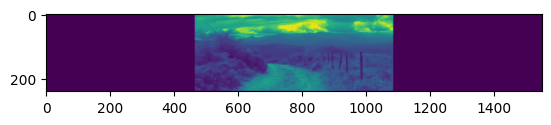

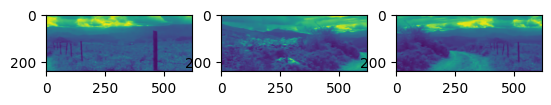

In [89]:
panorama_width =  int(2.5*width)
panorama_array = np.zeros((height, panorama_width))
num_of_frames = len(frames_gray_cropped) 
middle_frame = frames_gray_cropped[int(num_of_frames/2)]
panorama_center = int(panorama_width/2)
reference_frame_start = panorama_center - int(width/2)
panorama_array[:,reference_frame_start:reference_frame_start + width] = middle_frame
plt.figure()
plt.imshow(panorama_array)
early_frame = frames_gray_cropped[int(num_of_frames/100)]
late_frame = frames_gray_cropped[int(num_of_frames*(99/100))]
plt.figure()
plt.subplot(1,3,1), plt.imshow(early_frame)
plt.subplot(1,3,2), plt.imshow(late_frame)
plt.subplot(1,3,3), plt.imshow(middle_frame)

### 2.e - Frames matching
choose rectangular sub-images out of the early frame and the late frame. Choose the rectangles to have the same height as the original frames, and to contain the ovelapping area with the reference frame.

Apply the `match_corr` function twice: 
- using the reference frame and the sub-image of the early frame
- using the reference frame and the sub-image of the late frame

Display the sub-images you chose (grayscale and in the same figure). Set the titles to be the respective output coordinates of the `match_corr` function.

(240, 620)


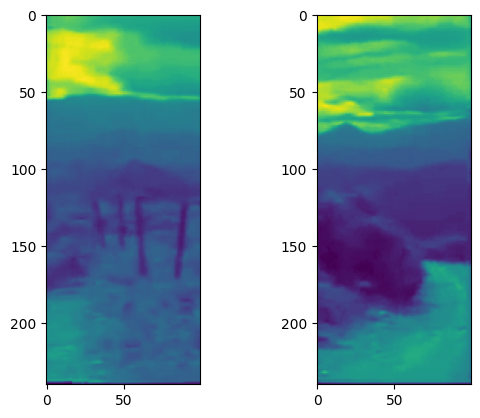

In [99]:
reference_early = early_frame[:, 0:100]
reference_late = late_frame[:, 520:620]
print(late_frame.shape)
plt.subplot(1,2,1), plt.imshow(reference_early)
plt.subplot(1,2,2), plt.imshow(reference_late)
match_coord_early = match_corr(reference_early, panorama_array)[1]
match_coord_late = match_corr(reference_late, panorama_array)[1]

### 2.f - It's panorama time!
Now that you have the appropriate coordinates for the two sub-images, you can evaluate the shift in the image between the early frame and the reference frame and between the late frame and the reference frame (mostly in the horizontal axis, but possibly also a little in the vertical axis - leading to some blank parts in the panorama image). Paste the early frame and the late frame (the full frames, and not just the sub-images), as part of the panorama image according to the displacement you found. Display the resulting panorama image. Are there problems in the final result? Explain.

**Notes:**
* Since we set the width of the panorama image to 2.5 the frame width, there may be parts of the early frame and the late frame that will not fit into the panorama array (the images edges), in this case the early / late frame width can be cut to fit the width of the panorama array. On the other hand - there can also be black margins at the sides of the result.
* Note that there will be overlapping pixels between the reference frame and the early frame and between the reference frame and the late frame. In these cases, set the pixel value in the panorama image as the average of the pixel values in the two frames.


758
465


(<AxesSubplot:title={'center':'averaged'}>,
 Text(0.5, 1.0, 'averaged'))

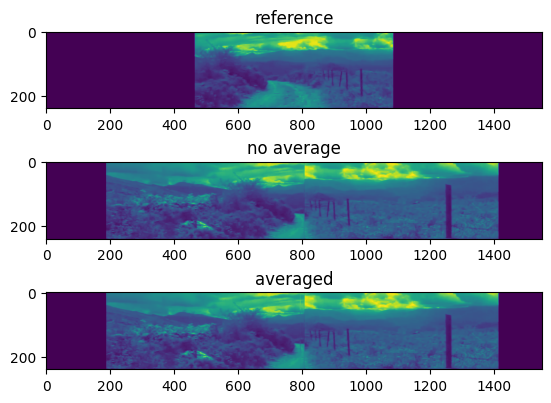

In [104]:
panorama_array_copy = panorama_array.copy()
print(match_coord_late)
print(reference_frame_start)
early_frame_start_index =  reference_frame_start + (match_coord_early - (reference_frame_start + 50))
late_frame_start_index = reference_frame_start + (match_coord_late - (reference_frame_start + 570))
panorama_array_copy[:,early_frame_start_index: early_frame_start_index + width] = early_frame
panorama_array_copy[:,late_frame_start_index:late_frame_start_index + width] = late_frame
average_pixel_early = (panorama_array[: ,early_frame_start_index] + early_frame[:,0]) // 2
average_pixel_late = (panorama_array[: ,late_frame_start_index] + early_frame[:,width-1]) // 2
panorama_array_final = panorama_array_copy.copy()
panorama_array_final[:, early_frame_start_index] = average_pixel_early
panorama_array_final[:, late_frame_start_index] = average_pixel_late
plt.subplot(3,1,1), plt.imshow(panorama_array), plt.title("reference")
plt.subplot(3,1,2), plt.imshow(panorama_array_copy), plt.title("no average")
plt.subplot(3,1,3), plt.imshow(panorama_array_final), plt.title("averaged")


## <img src="https://img.icons8.com/ios-filled/50/000000/keyboard.png" style="height:50px;display:inline"/> Part 3 - Spatial Filtering and Morphological Operations
---
In This part we would like to examine a practical use of the morphological operations we saw in exercise 4 and the spatial filters we saw in exercise 2. We will extract from an image of a keyboard, an image that contains only the keys.

You are encouraged to read the following openCV tutorial about morphological operations <br>
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html


### 3.a - Morphological operations
1. Load and display the image `keyboard.jpg`.
1. Create two morphological kernels: 
    1. A vertical line, 8 pixels long.
    1. A horizontal line, 8 pixels long.
1. Apply erosion on the image using each of the kernels **separately** and display the two results.
   What are the geometrical structures being conserved in each of the resulting images?
1. Sum the two images from the above section and display the summation image. Choose a threshold of `0.2*255` and transform the image to be binary - containing only `0` and `255` pixels. Display the result.


### 3.b - Median filtering
At this point we would like to use a median filter to isolate the keys. The keyboard keys are the connected components that contain the text. First perform a logical inversion (`NOT`) on the image from section 3.a.4 and then apply a median filter using a `9x9` kernel and the `cv2.medianBlur` function. Explain why a median filter is appropriate (i.e., why did we not choose a mean filter)?

### 3.c - Back to morphological operations
Now we want to place the keys better since it is possible that the connection image from section 2.b also contains the edges of the keys. Create a third square kernel, with a side of size 8 and apply erosion to the image from section 2.b using it. Present the result obtained.


### 3.d - Image sharpening and final thresholding
1. perform intersection between the result image from 2.c and the original image (e.g., by converting the binary image to `0,1` values and multiplying the images element-wise). Notice that multlipication is defined only for two arrays with the same type, so make sure both images are of `uint8` type. 
1. Sharpen the image by filtering it using the filter kernel $K$ and the openCV function `cv2.filter2D` where:
$$K=\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}$$
    Display the sharpened result. Why does this filter make the image sharper?
    * Note that `cv2.filter2D` performs correlation and not convolution, but in our case is doesn't matter because $K$ is symmetric.
1. Finally, in order to get rid of the unnecessary background on each of the keys, choose a threshold value that gives a good result in your opinion and transform the image to be binary. Display the final binary result and specify the chosen threshold in the title. Did you succeed in creating an image that contains only the keys in your opinion? Are there problems in the final result? Explain.

## <img src="https://img.icons8.com/external-others-pike-picture/50/000000/external-comparison-recognition-others-pike-picture.png" style="height:50px;display:inline"/> Part 4 - Image Restoration
---
In this part we want to restore an image out of a noisy version of it. In class, you learned about image restoration as solutions to optimization problems. In this field we look at our images from a probabilistic point of view in order to restore blurred/noisy images.

During this part we will use the movie trailer of Flash Gordon. You are encouraged to open the file `Flash Gordon Trailer.mp4`, to watch the video and enjoy the great music by Queen. :)

In this question we will test a specific restoration algorithm, but in order to do so, we must first create a noisy version of a given image. 

### 4.a - Pre-processing - Creating a noisy image
* Load one frame from the video `Flash Gordon Trailer.mp4`. The frame must be taken from the time section `00:20-00:21`. You may use the `video_to_frames` function from your first python HW. 
* Display this frame as a color image. 
* Choose **one** of the color channels out of the chosen frame: the **red** channel or the **green** channel. Display the grayscale image of the chosen channel. 
* Decrease the size of the image by a factor of 2 using `cv2.resize`. From now on we will use only this channel (after the resize) as our original image.
* Implement the `poisson_noisy_image` function, defined below, by following this procedure:<br>
  Let $a$ be the number of photons that have to arrive into the camera in order to be translated into one gray level. Now, we will create our Poisson noisy image (a.k.a shot noise) in a way which simulates realistic noise induced in an image taken by an optical camera (photon counting):
    1. transform the type of `X`, the input image, to `float` (the values of the image should still be in the range of `[0,255]`, just represented as `float` istead of `uint8`) and multiply the gray level values by $a$ in order to transform the image to number of photons units.
    2. Create a new Poisson noisy image by applying `np.random.poisson` on your image. Using this command, the value of every pixel in the input (number of photons) is refered to as the mean of a Poisson-distributed random variable.
    3. Divide the resulting image by $a$ in order to return the image to normal gray levels.
    4. Clip the image to `[0,255]` using `np.clip`, and transform the image type back to `uint8`.
    5. The noisy image you got will be the image $Y$.
* Make a noisy image out of the resized grayscale image using the `poisson_noisy_image` function with `a=3`.
* Display the noisy image result.


In [92]:
def poisson_noisy_image(X, a):
    """
    Creates a Poisson noisy image.
    :param X: The Original image. np array of size [H x W] and of type uint8.
    :param a: number of photons scalar factor
    :return:
        Y: The noisy image. np array of size [H x W] and of type uint8.
    """
    # ====== YOUR CODE: ======
    
    # ========================
    
    return Y

### 4.b - Denoise by L2
Let $Y$ be a noisy image version of the image $X$. In order to restore $X$ out of $Y$ we would would to minimize the following expression (cost function):
$$\varepsilon^2\{\underline{X}\}=(\underline{X}-\underline{Y})^T(\underline{X}-\underline{Y})+\lambda(D\underline{X})^T(D\underline{X})$$

Where $\underline{X}$ is a column-stack vector of the image $X$, $\underline{Y}$ is a column-stack vector of the noisy image $Y$, $\lambda$ is the regularization parameter, and $D$ is a sparse matix of the Laplacian operator, given by the kernel:
$$D_{kernel}=\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}$$

In order to restore the source image we will apply an iterative process, based on the Steepest Descent algorithm. The update step of the algorithm is:
$$\underline{\hat{X}}_{k+1} = \underline{\hat{X}}_{k}-\mu_k\underline{G}_k = \underline{\hat{X}}_{k}-\mu_k((I+\lambda D^TD)\underline{\hat{X}}_{k}-\underline{Y})$$
Where $I$ is the identity matrix and $\mu_k$ is the step size, which is determined by:
$$\mu_k = \frac{\underline{G}_k^T\underline{G}_k}{\underline{G}_k^T(I+\lambda D^TD)\underline{G}_k}$$
The process is initialized with $\underline{\hat{X}}_{0}=\underline{Y}$.

Implement the algorithm described above in the following function, where `Err1,2` are defined as follows:
$$
Err1\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{Y})^T(\underline{\hat{X}}_{k}-\underline{Y})+\lambda (D\underline{\hat{X}}_{k})^T(D\underline{\hat{X}}_{k})
$$
$$
Err2\{\underline{\hat{X}}_{k}\}=(\underline{\hat{X}}_{k}-\underline{X})^T(\underline{\hat{X}}_{k}-\underline{X})
$$

In [93]:
def denoise_by_l2(Y, X, num_iter, lambda_reg):
    """
    L2 image denoising.
    :param Y: The noisy image. np array of size [H x W]
    :param X: The Original image. np array of size [H x W]
    :param num_iter: the number of iterations for the algorithm perform
    :param lambda_reg: the regularization parameter
    :return:
        Xout: The restored image. np array of size [H x W]
        Err1: The error between Xk at every iteration and Y. 
              np array of size [num_iter]
        Err2: The error between Xk at every iteration and X. 
              np array of size [num_iter]
    """
    # ====== YOUR CODE: ======
    
    # ========================
    
    return Xout, Err1, Err2

Note that your algorithm uses the original image `X` only to calculate `Err2`, you sould not use it anywhere else in the algorithm! (make sure you understand why).

**Guidance**: Note that your inputs `Y,X` and your output `Xout` are image matrices (2d numpy arrays), but $\underline{Y},\underline{\hat{X}}, \underline{\hat{X}}_k$ are column-major order vectors. Use `npmatrix.flatten('F')` to create a column-order vector out of `npmatrix`. In addition, it is recommended to calculate the multlipication with $D$ using convolution with the kernel, and **not** calculating the full Toeplitz matrix. Note that every time you encounter a multlipication with $D$ in your calculation you must:
1. Transform the column vector into a matrix, using column-major order (`np.reshape(vector, newshape, order='F')`).
2. Convolve the matrix with the kernel using `cv2.filter2D` (note that the result has the same size as the input - 'same' convolution, and again - $D_{kernel}$ is symmetric so it doesn't matter that `cv2.filter2D` performs correlation and not convolution).
3. Transform the resulting matrix back to a cloumn vector.
* Notice that for example the $\lambda D^T D \underline{\hat{X}}$ part requires you to do the above process twice.

Now, use the function you wrote on the noisy image you created in section 4.a. use `lambda_reg = 0.5` and `num_iters = 50`. Display the result of the restoration in your report.

In addition, display **on a single graph** a logarithmic plot of the errors `Err1` and `Err2` as a function of the iteration number, and explain.

### 4.c - From synthetic to natural
Up to this point we worked with a synthetic image (created by computer graphics). We now want to test the performance of the algorithm using more "natural" images. 

Choose another frame from the video `Flash Gordon Trailer.mp4`. The frame must be taken from the time section `00:38-00:39` and must contain a natural image. Choose one of the color channels of the frame (Red or Green), decrease the size of the image by a factor of 2, and make a noisy image (according to the instructions in section 4.a). Repeat the denoising processes (4.b). Display the restored images and the errors plots in your report. Explain - what are the differences examining the natural images results in comparison to the synthetic ones? Discuss `Err1,2` values and the restored images quality.

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com